In [1]:
%matplotlib inline
# Plot everything as SVG
%config InlineBackend.figure_formats=['svg']

# Hide warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for 3d plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Config styling
palette = ['#386DF9', '#FFDC52', '#FF1614', '#62F591', '#AA22FF', '#34495E']
muted = '#dcdce6'
sns.set(font='Calibre', font_scale=1.1, style='darkgrid', palette=palette, context='talk')

$$y=mx+b$$

In [2]:
# useful functions

def plot_line(m, b, frm=0, to=200):
    xs = np.linspace(frm, to, 500)
    ys = np.dot(xs[:,np.newaxis], [m]) + b
    plt.plot(xs, ys)
    plt.title('$y={}x + {}$'.format(m,b))

def loss_function(m, b, X, y):
    y_hat = m*X + b
    
    # root mean squared error
    return np.sqrt(np.sum((y_hat - y)**2)/len(X))

def gen_data(m, b):
    X = np.linspace(50,150,100)

    # true function, with some noise
    y = m * X + np.random.normal(0, 12, X.shape[0]) + b
    return X, y

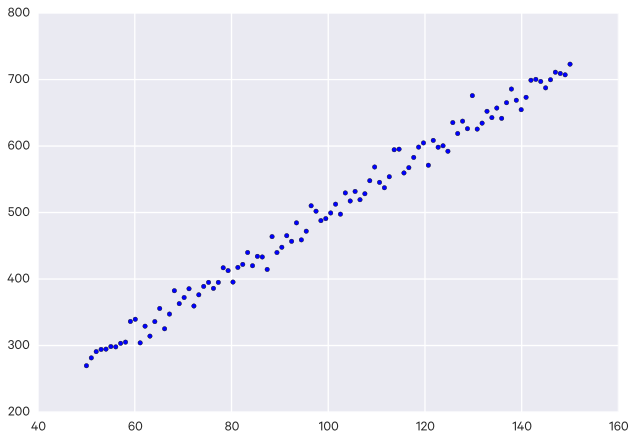

In [3]:
true_m = 4.5
true_b = 50

X, y = gen_data(true_m, true_b)
plt.scatter(X, y)

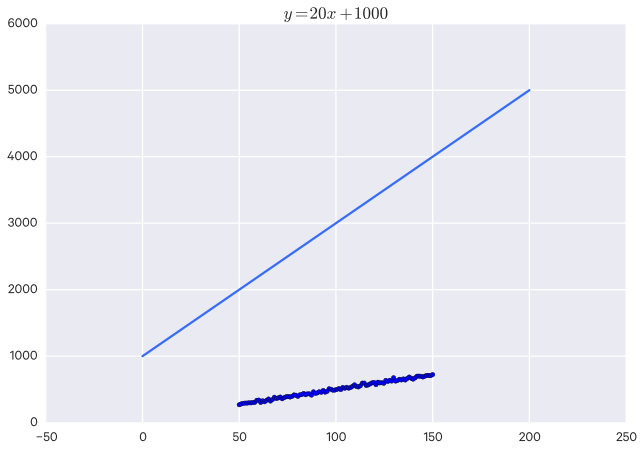

In [13]:
# plot the original data for comparison
plt.scatter(X, y)

m = 20
b = 1000
plot_line(m, b)

Loss for m=4.5, b=25: 28.3057546415


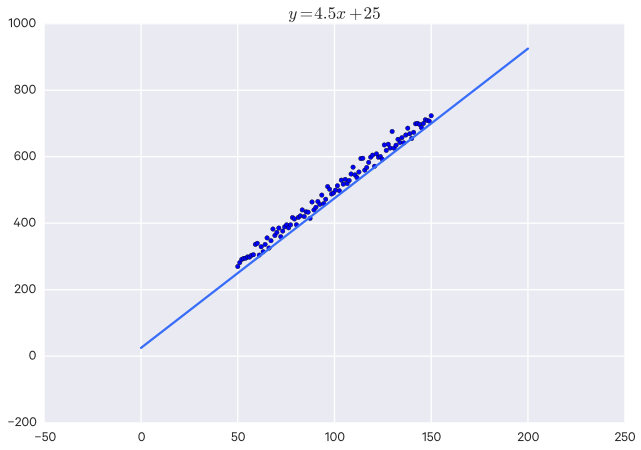

In [15]:
# plot the original data for comparison
plt.scatter(X, y)

m = 4.5
b = 25
plot_line(m, b)

print('Loss for m={}, b={}:'.format(m, b), loss_function(m, b, X, y))

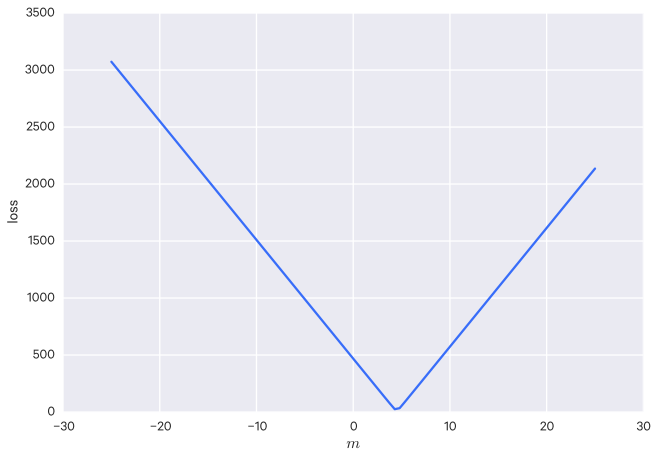

In [16]:
# fix b, assume we know the true value
b = true_b

ms = np.linspace(-25,25,100)
losses = []
for m in ms:
    losses.append(loss_function(m, b, X, y))
plt.plot(ms, losses)
plt.xlabel('$m$')
plt.ylabel('loss')

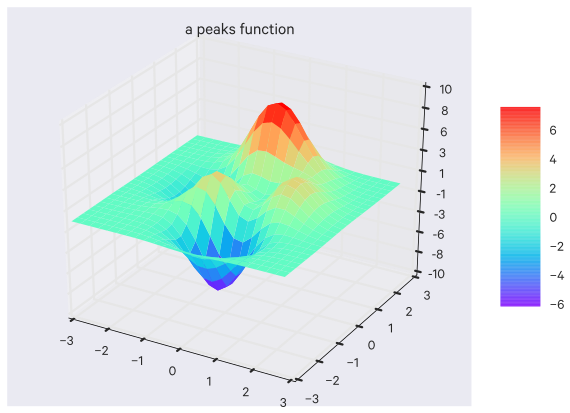

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 3*(1-X)**2*np.exp(-X**2 - (Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - 1/3*np.exp(-(X+1)**2 - Y**2)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
        linewidth=0, antialiased=False)
ax.set_zlim(-10, 10)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('a peaks function')